# House Price Prediction

November 20, 2021

*Kushal Dath*

The main aim of this project is to predict the house prices in King Country, Seattle (USA). We have the KC Sales Dataset available [here](https://www.kaggle.com/harlfoxem/housesalesprediction/data)

### About Dataset:

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

![house](https://miro.medium.com/max/402/1*D6s2K1y7kjE14swcgITB1w.png)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_csv('kc_house_data.csv')

#### We'll take a look at first 5 rows of our dataset by using the head function.

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### About some attributes related to Area :
1. sqft_living -> the total house square footage of the house
2. sqft_basement -> size of the basement
3. sqft_above = sqft_living - sqft_basement
4. sqft_lot -> lot size of the house
5. sqft_living15 -> the average house square footage of the 15 closest houses
6. sqft_lot15 -> the average lot square footage of the 15 closest houses
7. Total Area = sqft_living + sqft_basement

#### Shape of Our dataset.

In [4]:
df.shape

(21613, 21)

#### Size of our dataset.

In [5]:
df.size

453873

#### A statistical description of our dataset.

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Info about attributes of the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In this Dataset :
1. It has 21613 house information.
2. It has 21 feature.
3. Five features(price, bathrooms, floors,lat and long) are float64 type.
4. 15 features (id, bedrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, 5. yr_renovated, zipcode, sqft_living15, sqft_lot15) are int64 type.
6. One feature (object) is object type.
7. There isn't null all feature.

Checking sum of null-values(if any) in each column

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Luckily there are no null values in our dataset.

# Cleaning the data
### Dropping all the variables that are not necessary for the model

In [9]:
df.drop(['view','grade','yr_renovated','sqft_living15','sqft_lot15'],inplace=True, axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,1180,0,1955,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,2170,400,1951,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,770,0,1933,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,1050,910,1965,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,1680,0,1987,98074,47.6168,-122.045


# Exploratory Data Analysis (EDA) on the dataset and 
# Common affecting factors on the price of the houses

In [10]:
def des():
    sns.set_style('darkgrid')
    plt.figure(figsize=(10,6))
    
def info(t=None, x_lab=None, y_lab=None):    # info -> (title , x_label , y_label)
    plt.title(t)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.legend()

No handles with labels found to put in legend.


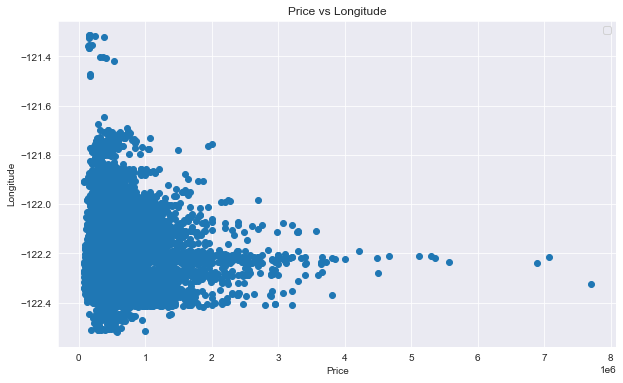

In [11]:
des()
plt.scatter(df.price,df.long)
info("Price vs Longitude","Price","Longitude")

No handles with labels found to put in legend.


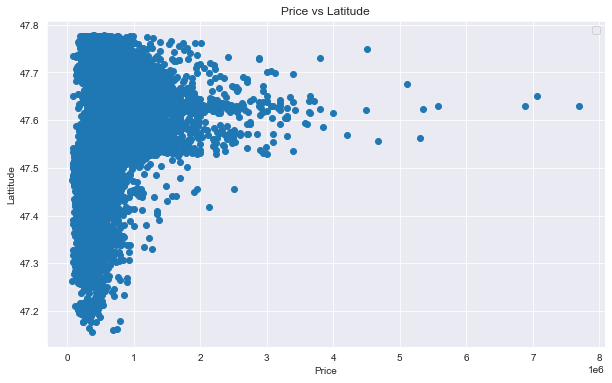

In [12]:
des()
plt.scatter(df.price,df.lat)
info("Price vs Latitude","Price","Lattitude")

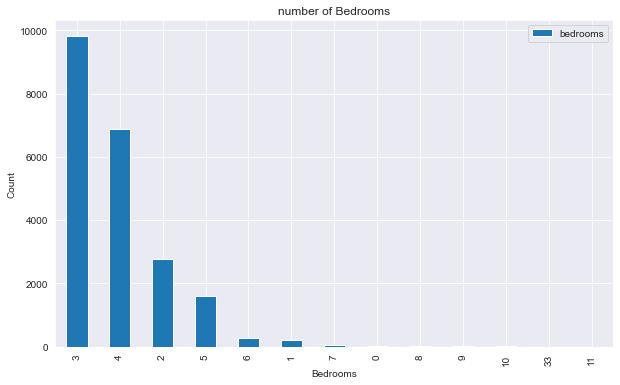

In [13]:
des()
# sns.countplot(x='bedrooms', data=df, palette='viridis')
df['bedrooms'].value_counts().plot(kind='bar')
info('number of Bedrooms','Bedrooms','Count')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


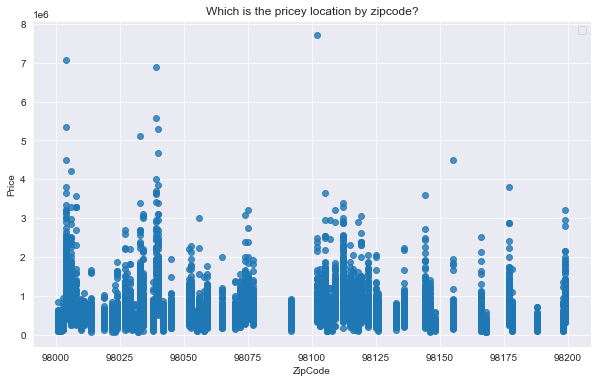

In [14]:
des()
sns.regplot(df['zipcode'], df['price'], fit_reg = False)
info('Which is the pricey location by zipcode?','ZipCode','Price')

<Figure size 720x432 with 0 Axes>

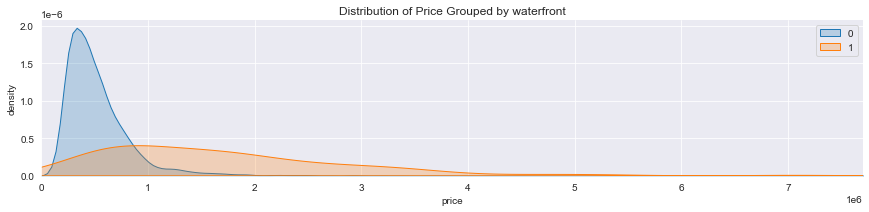

In [15]:
des()
fig = sns.FacetGrid(df, hue='waterfront', aspect=4)
fig.map(sns.kdeplot, 'price', shade=True)   # kde - kernel density estimate
x_max = df['price'].max()
fig.set(xlim=(0,x_max))
info('Distribution of Price Grouped by waterfront','price','density')

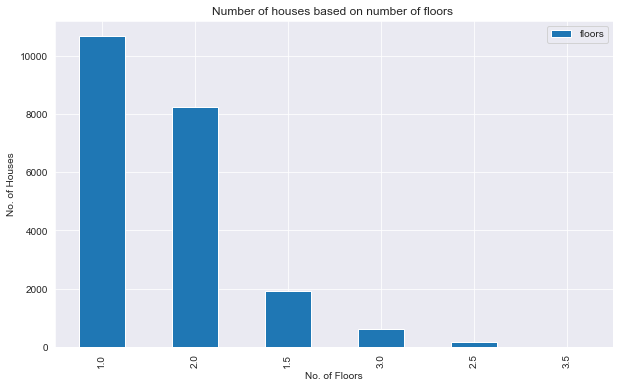

In [16]:
des()
df.floors.value_counts().plot(kind='bar')
info("Number of houses based on number of floors ","No. of Floors","No. of Houses")

<Figure size 720x432 with 0 Axes>

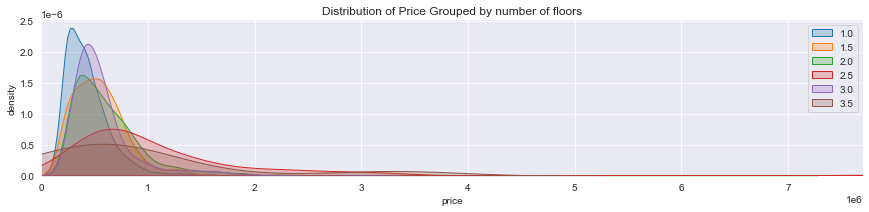

In [17]:
des()
fig = sns.FacetGrid(df, hue='floors', aspect=4)
fig.map(sns.kdeplot, 'price', shade=True)
x_max = df['price'].max()
fig.set(xlim=(0,x_max))
info('Distribution of Price Grouped by number of floors','price','density')

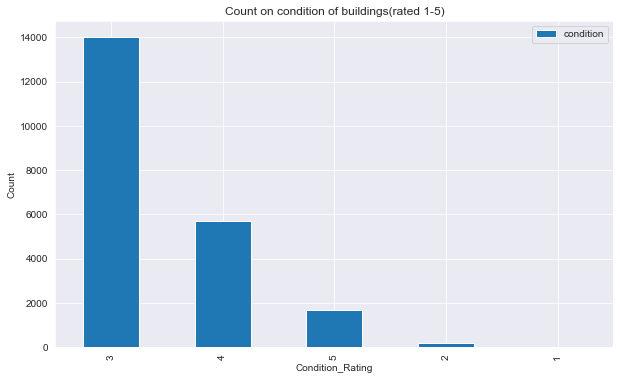

In [18]:
des()
df.condition.value_counts().plot(kind='bar')
info('Count on condition of buildings(rated 1-5)','Condition_Rating','Count')

No handles with labels found to put in legend.


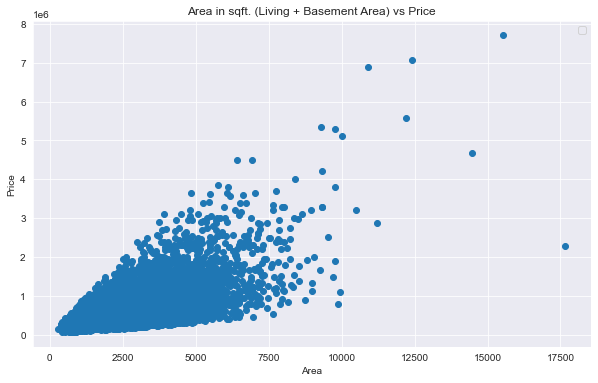

In [19]:
des()
plt.scatter((df['sqft_living'] + df['sqft_basement']), df['price'])
info('Area in sqft. (Living + Basement Area) vs Price','Area','Price')

### More Affecting Factors on Price with their Pari-wise Correlation Coefficient in heatmap:

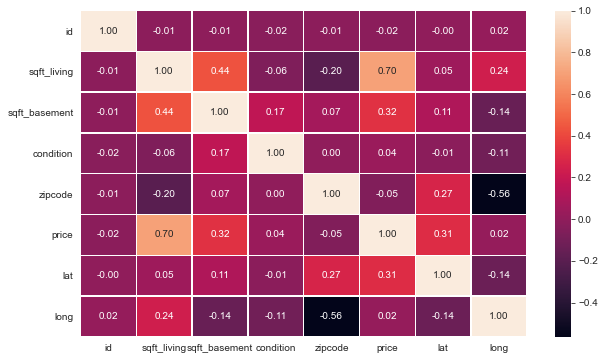

In [20]:
df1 = pd.DataFrame(df, columns = ['id','date','sqft_living','sqft_basement','condition','zipcode','price','lat','long'])
des()
sns.heatmap(df1.corr(),annot=True, fmt=".2f", linewidths=0.5)
plt.show()

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [21]:
sum_columns = df['sqft_living'] + df['sqft_basement']
df['Area'] = sum_columns

New_dates = [1 if values==2014 else 0 for values in df.date]
df['date'] = New_dates

X = df.drop(['id','date','Area','condition','zipcode','price'],axis=1)
y = df['price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X Train Shape", X_train.shape)
print("Y Train Shape", y_train.shape)
print("X Test Shape", X_test.shape)
print("Y Test Shape", y_test.shape)

X Train Shape (17290, 11)
Y Train Shape (17290,)
X Test Shape (4323, 11)
Y Test Shape (4323,)


# Creating Model, Training the Model and Model Evaluation

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [25]:
model_type = []
model_score = []

## Linear Regression

In [26]:
lm = LinearRegression()

In [27]:
model = lm.fit(X_train, y_train)

In [28]:
lm_predict = lm.predict(X_test)
print("Score: ",r2_score(lm_predict,y_test))

Score:  0.43086303331122555


In [29]:
model_type.append("Multi Linear Regression")
model_score.append(r2_score(lm_predict,y_test))

## Gradient Boosting Regressor

In [30]:
gbr = GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 2,learning_rate = 0.1, loss = 'ls')

In [31]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=500)

In [32]:
gbr_predict = gbr.predict(X_test)
print("Score: ",r2_score(gbr_predict,y_test))

Score:  0.8385295779700116


In [33]:
model_type.append("Gradient Boosting Regression")
model_score.append(r2_score(gbr_predict,y_test))

## Linear Regression after Boosting

In [34]:
print("Prediction Score of Linear Model after Boosting : ",lm.score(X_test, y_test))

Prediction Score of Linear Model after Boosting :  0.643891588453672


In [35]:
model_type.append("Multi Linear Regression After Boost")
model_score.append(lm.score(X_test, y_test))

#### Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [36]:
print(lm.intercept_)

-45633199.29638978


In [37]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-51065.194604
bathrooms,64682.508363
sqft_living,178.987474
sqft_lot,-0.071592
floors,8866.771570
waterfront,741638.793624
sqft_above,117.734120
sqft_basement,61.253354
yr_built,-2269.072229
lat,623942.839625


Interpreting the coefficients:

Holding all other values fixed, a unit increase in the value of one particular feature, the price of the house increases/decreases with an amount equal to it's coefficient.

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [38]:
predictions1 = lm.predict(X_test)

No handles with labels found to put in legend.


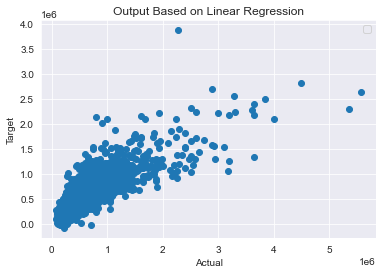

In [39]:
plt.scatter(y_test, predictions1)
info('Output Based on Linear Regression','Actual','Target')

In [40]:
predictions2 = gbr.predict(X_test)

No handles with labels found to put in legend.


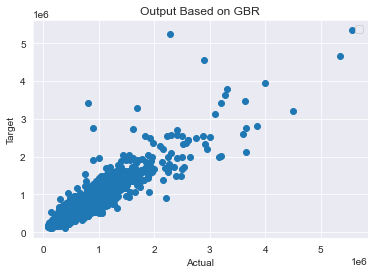

In [41]:
plt.scatter(y_test, predictions2)
info('Output Based on GBR','Actual','Target')

No handles with labels found to put in legend.


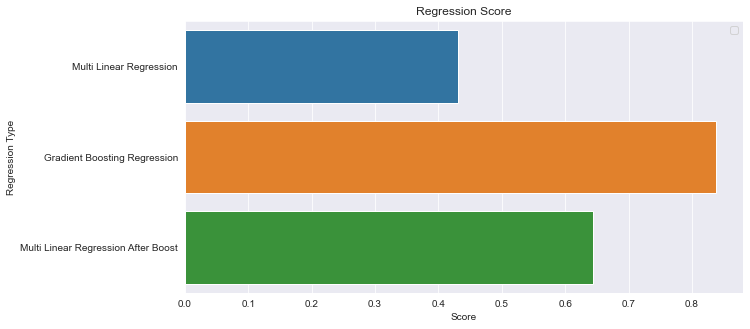

In [42]:
plt.subplots(figsize=(10,5))
sns.barplot(x = model_score , y = model_type)
info('Regression Score','Score','Regression Type')
plt.show()

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [46]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 77650.58744892168
MSE: 22813055783.506916
RMSE: 151039.91453753845


In [48]:
ids = df['id']
predict = gbr.predict(df.drop(['id','date','Area','condition','zipcode','price'] , axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'HOUSE_ID' : ids, 'PRICE': predict})
output.to_csv('Output.csv', index=False)